In [1]:
#building a binary classifier to identify input image as cat or non cat using log reg

In [19]:
import os
print(os.getcwd())


C:\Users\khush\ml\coursera


In [20]:
#packages
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
#loading the dataset
x_train,y_train,x_test,y_test,classes= load_dataset()

y = [0], it's a 'non-cat' picture.


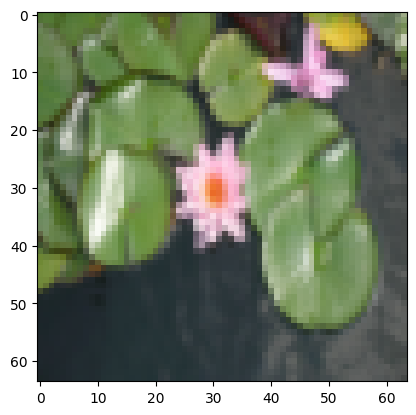

In [22]:
# Example of a picture
index = 26
plt.imshow(x_train[index])
print ("y = " + str(y_train[:, index]) + ", it's a '" + classes[np.squeeze(y_train[:, index])].decode("utf-8") +  "' picture.")

In [6]:
m_train=x_train.shape[0]
m_test=x_test.shape[0]
num_px=x_train.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [7]:
#reshaping the input feature vector
train_set_x_flatten=x_train.reshape(x_train.shape[0],-1).T
test_set_x_flatten=x_test.reshape(x_test.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [8]:
#standardizing the dataset for easier preprocessing of data
x_train=train_set_x_flatten/255
x_test=test_set_x_flatten/255

In [9]:
#helper functions to implement log_reg
#1.sigmoid function
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [10]:
sigmoid(np.array([0,2]))

array([0.5       , 0.88079708])

In [11]:
#2, function to initialise the parameters
#this function takes in dimension of the feature vector manje kitne length ka f.v initialise karna hai to 0 aur bias term to awai 0 se initialse hogi
def init(dim):
    w=np.zeros((dim,1))
    b=0.0
    return w,b

In [12]:
#3. function to implement forward and backward propogation
def propogate(w,b,X,Y):
    m_train=X.shape[1]
    #forward propogation
    z=np.dot(w.T,X)+b
    a=sigmoid(z)
    cost=-1/m_train*np.sum(Y*np.log(a)+(1-Y)*np.log(1-a))
    #backward propogation
    dz=a-Y
    dw=1/m_train*np.dot(X,dz.T)
    db=1/m_train*np.sum(dz)
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
#optimisation i.e. minimising the calculated cost function by applying gds
def optimise(w,b,X,Y,num_iterations=100, learning_rate=0.009, print_cost=False):
    w=copy.deepcopy(w)
    b=copy.deepcopy(b)
    costs=[]
    #how many times to apply gds
    for i in range(num_iterations):
        grads,cost=propogate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
#prediction:finally applying what all you have learnt
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A=sigmoid(np.dot(w.T,X)+b)
    
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        if(A[0,i]>0.5):
            Y_prediction[0,i]=1
        else:
                Y_prediction[0,i]=0
        return Y_prediction

In [15]:
# FINALLY this is the last function implmenting the full log_reg model
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    dim=X_train.shape[0]
    w,b=init(dim)
    print(w.shape)
    params,grads,costs=optimise(w,b,X_train,Y_train,num_iterations,learning_rate)
#w,b directly as arg pass nahi kar rakhe to params dictionary se retrieve karo
    w=params["w"]
    b=params["b"]
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d    

In [16]:
logistic_regression_model = model(x_train, y_train, x_test, y_test, num_iterations=2000, learning_rate=0.005, print_cost=True)

(12288, 1)
train accuracy: 65.55023923444976 %
test accuracy: 36.0 %


y = 0.0, your algorithm predicts a "non-cat" picture.


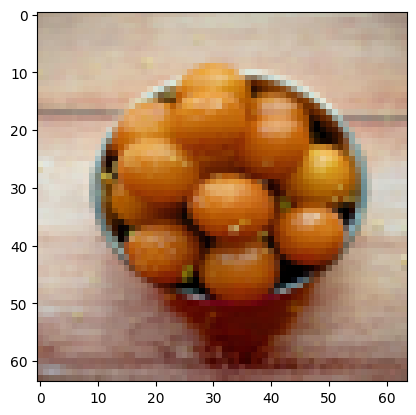

In [17]:
# change this to the name of your image file
my_image = "Gulab.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")